## INTRO. Imports, carga de datos y vistazo inicial 

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors

En este análisis, nos proponemos explorar y clasificar canciones de Spotify utilizando técnicas de **clustering**. El objetivo es identificar patrones y grupos de canciones que compartan características similares en su estructura de sonido. A través de este proceso, esperamos descubrir agrupaciones de canciones que puedan tener características comunes, como el ritmo, la tonalidad, la instrumentación, entre otros aspectos musicales.

A lo largo de este notebook, se probarán diferentes técnicas de clustering, y se evaluarán sus resultados para entender mejor la estructura subyacente de las canciones y sus posibles agrupaciones.


**Explicación de las varibables:**
- track: Nombre de la canción.
- artist: Artista de la canción.
- uri: Identificador de recurso de la canción.
- danceability: Qué tan bailable es la canción (0.0 a 1.0).
- energy: Medida de intensidad y actividad de la canción.
- key: Tono de la canción.
- loudness: Nivel de volumen promedio.
- mode: Modalidad de la canción (0 = menor, 1 = mayor).
- speechiness: Medida de palabras habladas en la pista.
- acousticness: Confianza de que la canción sea acústica.
- instrumentalness: Si la canción tiene voz o no.
- liveness: Presencia de audiencia en la grabación.
- valence: Positividad transmitida por la canción.
- tempo: Velocidad de la canción en BPM.
- duration_ms: Duración de la pista en milisegundos.
- chorus_hit: Mejor estimación del inicio del estribillo.
- sections: Número de secciones en la canción.
- target: ['Underground Rap', 'techhouse', 'Trap Metal', 'techno', 'Hiphop', 'Pop', 'RnB', 'trance', 'psytrance', 'trap', 'Rap', 'Dark Trap', 'dnb', 'Emo', 'hardstyle']


In [4]:
data = pd.read_csv('data/train.csv')
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id
0,0.896,0.691,1,-7.403,1,0.3690,0.011800,0.000,0.0883,0.6650,...,spotify:track:1lKQIxQDnLKoFhNWwMFiho,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863
1,0.432,0.962,2,-5.834,1,0.1300,0.001930,0.162,0.6300,0.1240,...,spotify:track:6xyHjM4VecIRZDUldiiBA5,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452
2,0.686,0.692,0,-5.573,0,0.3230,0.482000,0.000,0.1690,0.6490,...,spotify:track:1rZvU5sb2E8LuJTAqEdAiw,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111
3,0.441,0.891,7,-2.873,0,0.0370,0.017700,0.815,0.1840,0.0353,...,spotify:track:1TDjiNBekgMInzoNZxYi0D,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665
4,0.376,0.876,4,-2.695,0,0.1010,0.034500,0.000,0.1250,0.2500,...,spotify:track:79fspqGOIP7FInu1elXhVX,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,0.855,0.586,6,-7.134,1,0.1670,0.200000,0.000,0.2530,0.7510,...,spotify:track:13sDDPTmAwDvkONEQ8OB3i,https://api.spotify.com/v1/tracks/13sDDPTmAwDv...,https://api.spotify.com/v1/audio-analysis/13sD...,85217,4,Underground Rap,Smithy,NaN,NaN,6265
33840,0.760,0.726,0,-4.726,1,0.0652,0.057600,0.000,0.0514,0.8860,...,spotify:track:0PCKaqffqRsFYxKy7uTLti,https://api.spotify.com/v1/tracks/0PCKaqffqRsF...,https://api.spotify.com/v1/audio-analysis/0PCK...,120059,4,Trap Metal,Soul Doubt,NaN,NaN,11284
33841,0.464,0.838,8,-6.762,1,0.0401,0.000151,0.756,0.0671,0.1510,...,spotify:track:5RCkepCUwImdkbZhIUtglm,https://api.spotify.com/v1/tracks/5RCkepCUwImd...,https://api.spotify.com/v1/audio-analysis/5RCk...,350345,4,dnb,NaN,16774.0,Liquid Drum & Bass,38158
33842,0.683,0.590,0,-4.949,1,0.3590,0.215000,0.000,0.1350,0.0401,...,spotify:track:72x9Lcah4SMfE5TRf7gira,https://api.spotify.com/v1/tracks/72x9Lcah4SMf...,https://api.spotify.com/v1/audio-analysis/72x9...,117923,4,Dark Trap,Seventy Four,NaN,NaN,860


## Data pre-procesing

Se efectura un pre-procesamiento de datos sencilllo para poder empezar a trabajar con el dataset.

### Eliminamos variables no necesarias

In [5]:
# son identificadores e información para la API que no da información útil sobre la canción
data.drop('id', axis = 1, inplace= True)
data.drop('type', axis = 1, inplace= True)
data.drop('uri', axis = 1, inplace= True)
data.drop('track_href', axis = 1, inplace= True)
data.drop('analysis_url', axis = 1, inplace= True)

## Unnamed: 0 parece que se genera cuando el registro no tienen un nombre de canción, hay muchas vacias y no parece tener relación directa con la canción 
## Id es un identificador de la BBDD, podemos borralo
data.drop('Unnamed: 0', axis = 1, inplace= True)
data.drop('Id', axis = 1, inplace= True)

## por el momento, borramos las columnas de title y song name: 
data.drop('song_name', axis = 1, inplace= True)
data.drop('title', axis = 1, inplace= True)

## menos importante
## data.drop('mode', axis = 1, inplace= True)
## data.drop('time_signature', axis = 1, inplace= True)

## Vamos a utilizar algoritmos de clustering. Aprendizaje no supervisado, eliminamos variable objetivo
data.drop('genre', axis = 1, inplace= True)



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  duration_ms       33844 non-null  int64  
 12  time_signature    33844 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.4 MB


### Tramiento de outliers

In [7]:
percentile_95_Danceability = data['danceability'].quantile(0.95)
percentile_5_Danceability = data['danceability'].quantile(0.05)

percentile_95_energy = data['energy'].quantile(0.95)
percentile_5_energy = data['energy'].quantile(0.05)

percentile_95_loudness = data['loudness'].quantile(0.95)
percentile_5_loudness = data['loudness'].quantile(0.05)

percentile_95_speechiness = data['speechiness'].quantile(0.95)
percentile_5_speechiness = data['speechiness'].quantile(0.05)

percentile_95_tempo = data['tempo'].quantile(0.95)
percentile_5_tempo = data['tempo'].quantile(0.05)

percentile_95_liveness = data['liveness'].quantile(0.95)
percentile_5_liveness = data['liveness'].quantile(0.05)

percentile_95_acousticness = data['acousticness'].quantile(0.95)
percentile_5_acousticness = data['acousticness'].quantile(0.05)

percentile_95_duration_ms = data['duration_ms'].quantile(0.95)
percentile_5_duration_ms = data['duration_ms'].quantile(0.05)

data['duration_ms'] = data['duration_ms'].clip(lower=percentile_5_duration_ms, upper=percentile_95_duration_ms)

data['acousticness'] = data['acousticness'].clip(lower=percentile_5_acousticness, upper=percentile_95_acousticness)

data['liveness'] = data['liveness'].clip(lower=percentile_5_liveness, upper=percentile_95_liveness)

data['tempo'] = data['tempo'].clip(lower=percentile_5_tempo, upper=percentile_95_tempo)

data['speechiness'] = data['speechiness'].clip(lower=percentile_5_speechiness, upper=percentile_95_speechiness)

data['loudness'] = data['loudness'].clip(lower=percentile_5_loudness, upper=percentile_95_loudness)

data['energy'] = data['energy'].clip(lower=percentile_5_energy, upper=percentile_95_energy)

data['danceability'] = data['danceability'].clip(lower=percentile_5_Danceability, upper=percentile_95_Danceability)

### Estandarización

In [8]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data (scaling)
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back into a DataFrame with the same column names (excluding 'label')
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

# Add the 'label' column back to the scaled data
# data_train = pd.concat([data_scaled, data[['genre']]], axis=1)

# Display the first few rows of the scaled data
print(data_scaled.head())


   danceability    energy       key  loudness      mode  speechiness  \
0      1.615532 -0.439314 -1.197591 -0.380211  0.906382     2.103800   
1     -1.436814  1.130363 -0.924416  0.227256  0.906382    -0.019462   
2      0.305424 -0.433522 -1.470766  0.328306 -1.103287     1.695139   
3     -1.375081  0.719119  0.441460  1.373660 -1.103287    -0.845669   
4     -1.807211  0.632237 -0.378065  1.442576 -1.103287    -0.277096   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.540035         -0.767334 -0.772357  1.317208  1.952657    -1.012487   
1     -0.611496         -0.331527  2.655921 -0.998500 -0.435077    -0.320391   
2      2.864334         -0.767334 -0.253972  1.248721  1.211525     0.201346   
3     -0.497318          1.425152 -0.157618 -1.378173  1.268007     0.725387   
4     -0.375681         -0.767334 -0.536610 -0.459167  2.071919    -0.285551   

   time_signature  
0        0.100091  
1        0.100091  
2       -3.630617  
3     

## Algoritmos de Clustering

Es relevante señalar que, inicialmente, contamos con 15 etiquetas que corresponden a diferentes géneros musicales, tales como: 

`['Underground Rap', 'Techhouse', 'Trap Metal', 'Techno', 'Hiphop', 'Pop', 'RnB', 'Trance', 'Psytrance', 'Trap', 'Rap', 'Dark Trap', 'DNB', 'Emo', 'Hardstyle']`.

Sin embargo, en este análisis no vamos a utilizar estas etiquetas, ya que el objetivo es aplicar técnicas de **clustering no supervisado**. En el clustering no supervisado, buscamos identificar patrones y agrupaciones de datos sin la necesidad de información previa sobre las categorías o etiquetas de los datos. Esto nos permitirá explorar y descubrir grupos de canciones basados únicamente en sus características inherentes, sin la influencia de etiquetas predefinidas.


### K-MEANS

El algoritmo **K-means** es uno de los métodos más populares para clustering. Asigna las muestras a un número fijo de clusters (K), basándose en la minimización de la distancia entre las muestras y los centroides de los clusters. Aunque es eficiente, su rendimiento depende de la elección inicial de los centroides y puede ser sensible a los valores atípicos.


For 2 clusters: average silhouette_score is 0.13967724410992782
For 2 clusters: elbow is 376671.4992388855
For 3 clusters: average silhouette_score is 0.14361703628858738
For 3 clusters: elbow is 332782.6400378062
For 4 clusters: average silhouette_score is 0.1363052459231872
For 4 clusters: elbow is 312988.0571426698
For 5 clusters: average silhouette_score is 0.12010653664330515
For 5 clusters: elbow is 300872.8568721616
For 6 clusters: average silhouette_score is 0.11555092100337841
For 6 clusters: elbow is 287640.80834544
For 7 clusters: average silhouette_score is 0.11601365340893227
For 7 clusters: elbow is 277477.0799838054
For 8 clusters: average silhouette_score is 0.11522442971485024
For 8 clusters: elbow is 269068.0014269317
For 9 clusters: average silhouette_score is 0.11541465181068455
For 9 clusters: elbow is 260662.3255143151
For 10 clusters: average silhouette_score is 0.09914883366297068
For 10 clusters: elbow is 256984.60932196764
For 11 clusters: average silhouette_s

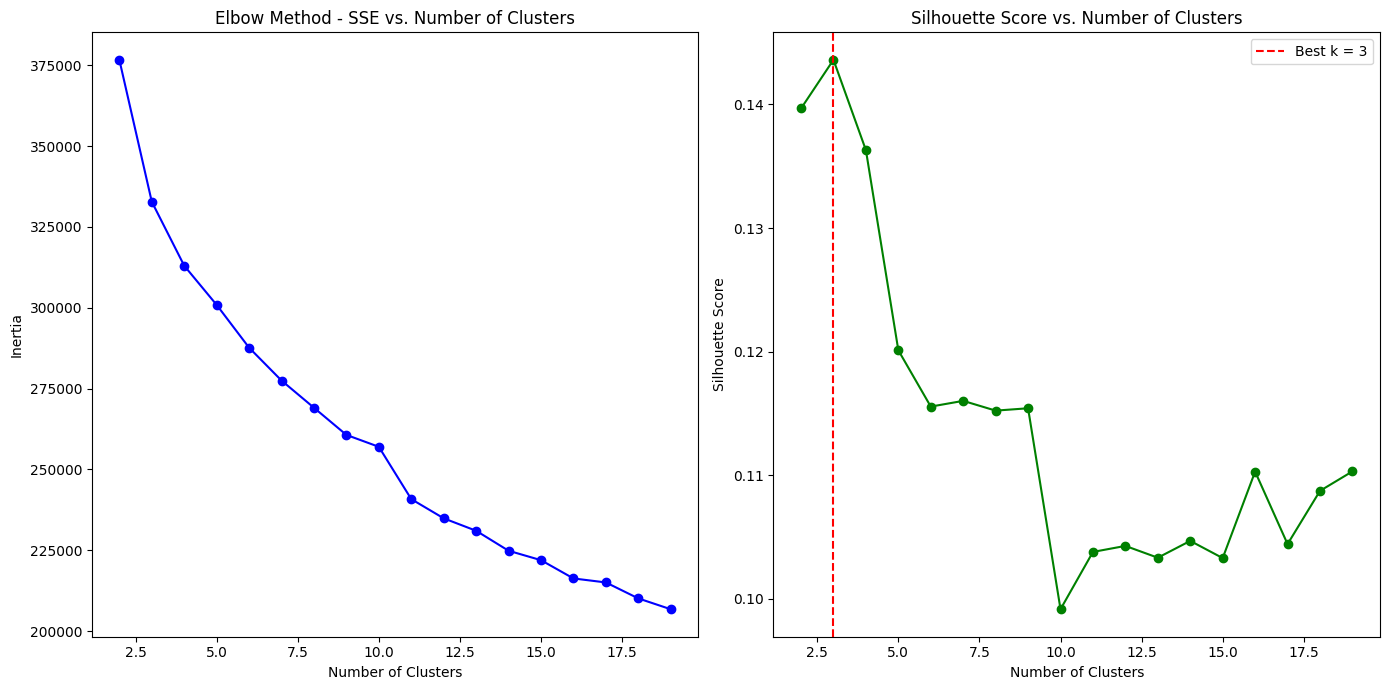

In [ ]:
## Buscamos en número óptimo de clusters mediantes Elblow y Silhouette
range_n_clusters = range(2,20)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
   clusterer.fit(data_scaled)
   labels = clusterer.labels_
   silhouette_avg = silhouette_score(data_scaled, labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   print(f"For {n_clusters} clusters: elbow is {clusterer.inertia_}")
   elbow.append(clusterer.inertia_)


# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico del Elbow Method (Inertia)
axs[0].plot(range_n_clusters, elbow, marker='o', linestyle='-', color='b')
axs[0].set_title('Elbow Method - SSE vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia')

# Gráfico del Silhouette Score
axs[1].plot(range_n_clusters, ss, marker='o', linestyle='-', color='g')
axs[1].set_title('Silhouette Score vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')

# Mostrar mejor k
best_k = range_n_clusters[np.argmax(ss)]
axs[1].axvline(best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
axs[1].legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede observar que el error (inercia) disminuye a medida que se incrementa el número de clusters, de forma bastante constante. Sin embargo, al analizar la gráfica del Silhouette Score, se identifica que el punto óptimo parece estar en 3 clusters. Esto tiene sentido, considerando que muchos de los géneros musicales presentes en el dataset original comparten características similares.

La diferenciación entre géneros puede estar más influida por aspectos como la cultura, el contexto social o la temática, más que por diferencias estructurales en el sonido. Es posible que el modelo esté capturando precisamente ese tipo de agrupaciones latentes.

Una posible interpretación de los tres estilos principales identificados por el clustering podría ser:


| Rap / Trap / Hip-Hop         | Electrónica                  | Melódico / Mainstream  |
|-----------------------------|------------------------------|------------------------|
| Rap                         | Techhouse                    | Pop                    |
| Underground Rap            | Techno                       | RnB                    |
| Hiphop                      | Trance                       |                        |
| Trap                        | Psytrance                    |                        |
| Trap Metal                 | DNB (Drum and Bass)          |                        |
| Dark Trap                  | Hardstyle                    |                        |
| Emo *(Emo Rap)*            |                              |                        |


In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [50]:
labels = kmeans.labels_
# Calcular el Silhouette Score
sil_score = silhouette_score(data_scaled, labels)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1436


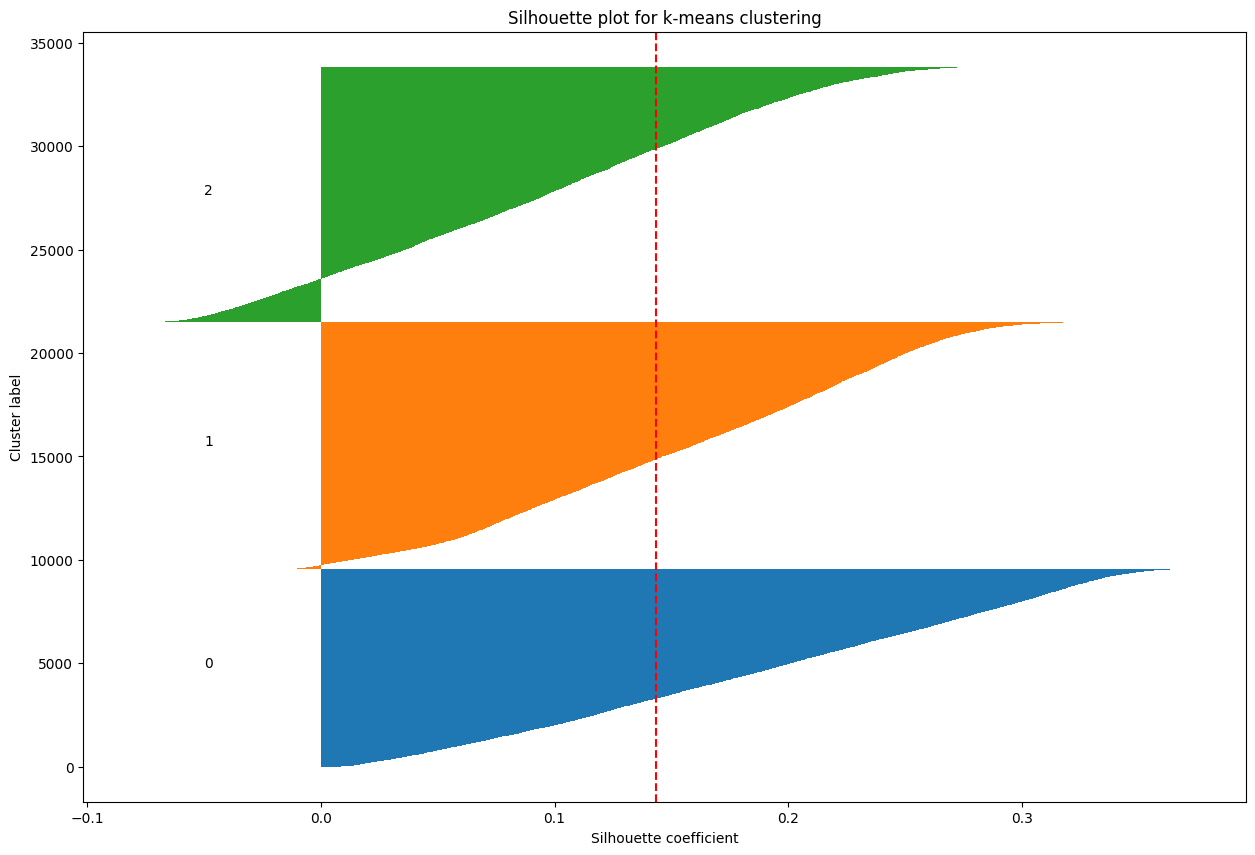

In [ ]:
# Tarea: Calcular los valores de silhouette para cada muestra y el avg
silhouette_vals = silhouette_samples(data_scaled,kmeans.labels_)
silhouette_avg = silhouette_score(data_scaled,kmeans.labels_)
# Plot silhouette plot
y_lower, y_upper = 0, 0

# Realizamos el plot de los Silhouette
plt.figure(figsize=(15,10))

# Para cada cluster
for i in range(kmeans.n_clusters):
    # 1 Obtenemos los valores silhouette de el cluster que estamos trabajando, es decir, i
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    # 2 Los ordenamos
    cluster_silhouette_vals.sort()

    # Obtenemos el valor superior
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    # Obtenemos el valor mínimo para la siguiente itearción
    y_lower += len(cluster_silhouette_vals)

# Plotear el silhouette average como una línea vertical
plt.axvline(x=silhouette_avg, color = 'red', linestyle = '--')


plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

En los gráficos de Silhouette se puede observar que la mayoría de las muestras presentan valores superiores a 0, lo que sugiere una cierta cohesión dentro de los clusters. Sin embargo, los valores obtenidos no son lo suficientemente elevados como para afirmar que las agrupaciones sean claramente óptimas o bien definidas. Esto indica que, aunque hay algo de estructura en los datos, la calidad del clustering podría mejorarse para obtener agrupaciones más consistentes y representativas.


### DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en la densidad. A diferencia de K-means, DBSCAN no requiere especificar el número de clusters de antemano y puede identificar clusters de forma no esférica. También es capaz de identificar y manejar valores atípicos (outliers), marcándolos como "ruido".

In [ ]:
# Encontrar las distancias k. K es el número de vecinos que se analiza.
k = 8
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distance, _ = neighbors_fit.kneighbors(data_scaled)

In [ ]:
# Ordenamos las muestras de menor a mayor, mirar los ejes
distance_sorted = np.sort(distance, axis = 0)
# Realizar la media de cada muestra
distance_mean = distance_sorted.mean(axis= 1)

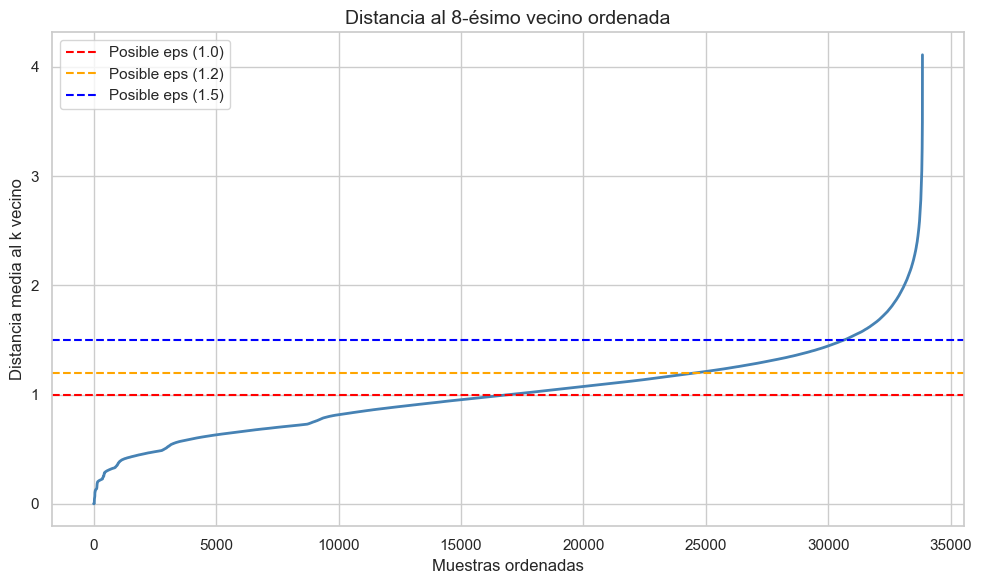

In [44]:
# Estilo de seaborn
sns.set(style="whitegrid")

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Gráfico de línea de las distancias medias
sns.lineplot(x=range(len(distance_mean)), y=distance_mean, color='steelblue', linewidth=2)

# Añadir líneas guía para visualizar el codo (puedes ajustar el valor de eps estimado aquí si quieres marcarlo)
plt.axhline(y=1.0, color='red', linestyle='--', label='Posible eps (1.0)')
plt.axhline(y=1.2, color='orange', linestyle='--', label='Posible eps (1.2)')
plt.axhline(y=1.5, color='blue', linestyle='--', label='Posible eps (1.5)')

# Títulos y etiquetas
plt.title('Distancia al {}-ésimo vecino ordenada'.format(k), fontsize=14)
plt.xlabel('Muestras ordenadas', fontsize=12)
plt.ylabel('Distancia media al k vecino', fontsize=12)

# Leyenda
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
# Entrenar DBSCAN, elegimos eps acorde a la gráfica anterior (se ha probado con 1.0, 1.2, 1.5, 1.7)
dbscan = DBSCAN(eps= 1.7, min_samples=8)
dbscan.fit(data_scaled)

DBSCAN(eps=1.7, min_samples=8)

In [73]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl["cluster"].value_counts()

cluster
 0     16882
 1     13890
-1      2714
 2       122
 3        64
 4        57
 6        31
 5        28
 9        16
 8        13
 11       11
 12        6
 7         5
 10        5
Name: count, dtype: int64

In [74]:
# Obtener el Silhouette Score
cluster_predict = dbscan.labels_
silhouette_score(data_scaled,cluster_predict)

np.float64(0.01185461222324034)

### Gaussian-Mixture

El modelo **Gaussian Mixture** (GMM) asume que los datos provienen de una mezcla de varias distribuciones gaussianas. Utiliza el enfoque de Expectation-Maximization (EM) para estimar los parámetros de las distribuciones y asignar probabilísticamente las muestras a los clusters. Es más flexible que K-means, ya que los clusters no tienen que ser esféricos y pueden tener diferentes tamaños y formas.

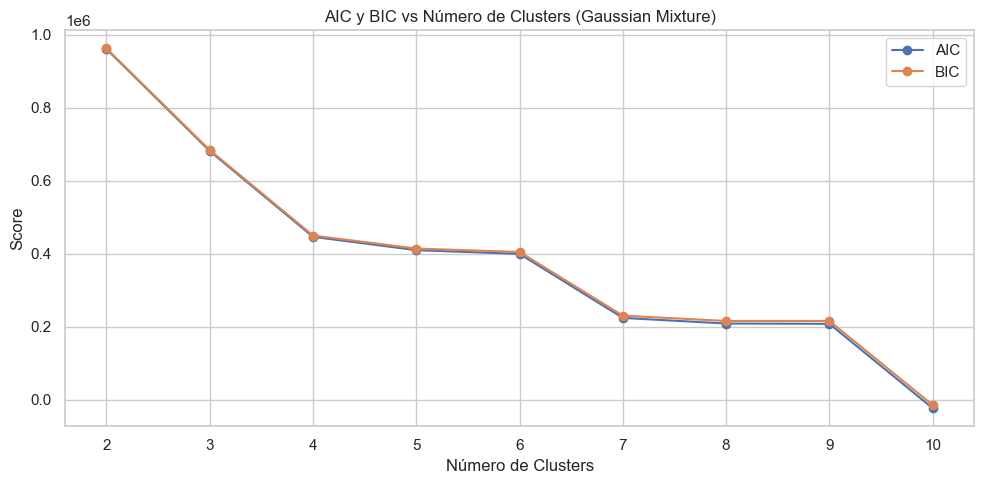

In [75]:
from sklearn.mixture import GaussianMixture

n_clusters = range(2, 11)
aic_scores = []
bic_scores = []

for n in n_clusters:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(data_scaled)
    aic_scores.append(gm.aic(data_scaled))
    bic_scores.append(gm.bic(data_scaled))

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aic_scores, label='AIC', marker='o')
plt.plot(n_clusters, bic_scores, label='BIC', marker='o')
plt.title('AIC y BIC vs Número de Clusters (Gaussian Mixture)')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


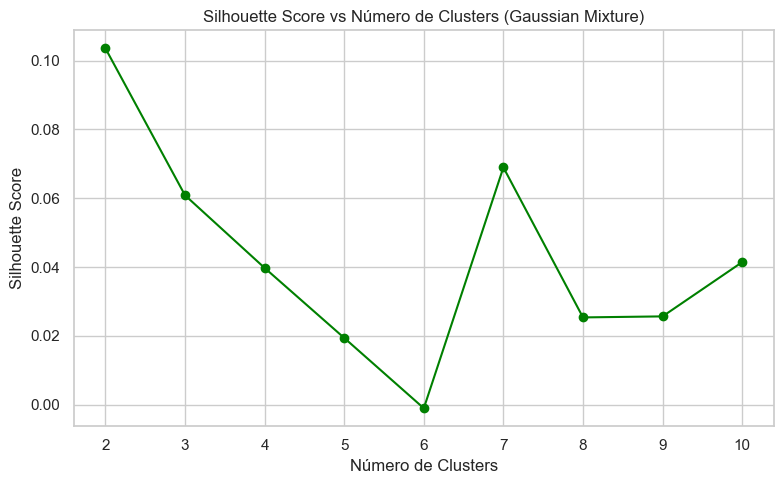

In [76]:
silhouette_scores = []

for n in n_clusters:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(data_scaled)
    labels = gm.predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Plotear los resultados
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score vs Número de Clusters (Gaussian Mixture)')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Parece que 7 clusters podrían ser un objetivo razonable, ya que representan el segundo mejor valor en términos del coeficiente de silueta. Además, esta configuración reduce las métricas AIC y BIC, lo que sugiere una mejora en la calidad del modelo y una mejor adaptación a los datos en comparación con otras opciones de agrupamiento

In [85]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(data_scaled)

# Obtener las etiquetas de los clusters
labels = gmm.predict(data_scaled)

In [86]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Índice de Silueta: {silhouette_avg:.3f}")

Índice de Silueta: 0.069


### BIRCH

**BIRCH** (Balanced Iterative Reducing and Clustering using Hierarchies) es un algoritmo diseñado para manejar grandes volúmenes de datos. Combina técnicas de clustering jerárquico con un enfoque de partición, y es especialmente eficiente para grandes conjuntos de datos, ya que utiliza un árbol de resumen para reducir la complejidad computacional. BIRCH es adecuado para clusters de forma arbitraria y puede ser una opción eficaz cuando se trabaja con grandes volúmenes de datos.

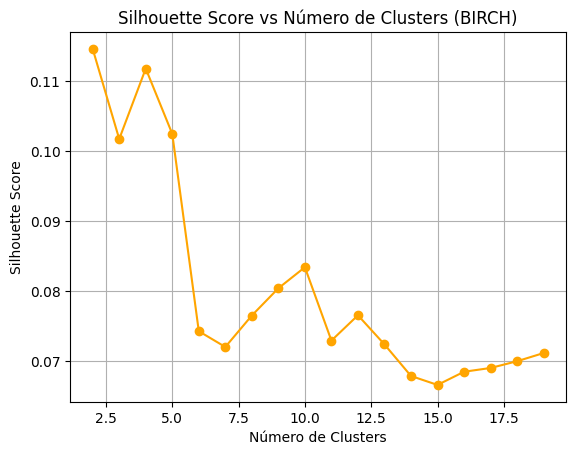

In [11]:
silhouette_scores = []
range_n_clusters = range(2, 20)

for n in range_n_clusters:
    birch = Birch(n_clusters=n)
    birch.fit(data_scaled)
    labels = birch.labels_
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Gráfica del Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.title('Silhouette Score vs Número de Clusters (BIRCH)')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [12]:
birch = Birch(n_clusters=3)
birch.fit(data_scaled)
# Calcular el índice de silueta
labels = birch.labels_
silhouette_avg = silhouette_score(data_scaled, labels)
print(f"Índice de Silueta: {silhouette_avg:.3f}")

Índice de Silueta: 0.102


## Conclusiones

Se han evaluado diferentes métodos de clustering para el análisis de los datos, obteniendo los siguientes resultados en términos del coeficiente de silueta:

- **KNN**: 0.14, 3 clusters
- **DBSCAN**: 0.01, 13 clusters
- **Gaussian Mixture**: 0.069, 7 clusters
- **BIRCH**: 0.102, 3 clusters

Los valores de silueta obtenidos no son elevados, lo que sugiere que la calidad del clustering no es óptima. Además, el número de clusters obtenido en cada método parece inconsistente, lo que indica que los patrones no son claros o estables.

Es posible que el enfoque actual no esté capturando adecuadamente las complejidades del problema. En lugar de centrarnos únicamente en las características estructurales del sonido de las canciones, sería recomendable explorar un enfoque más centrado en el **consumidor de música**. La clasificación de las canciones no solo depende de sus características sonoras, sino también de factores como el contexto cultural, el artista, la temática y la subjetividad del oyente. Estos elementos pueden tener un impacto significativo en cómo se agrupan y perciben las canciones.

Por lo tanto, podría ser útil replantear el enfoque del problema y considerar la inclusión de variables adicionales relacionadas con la experiencia del oyente y otros factores contextuales.
